debug start
('start on:', 'Run time: 2019-02-24 00:02:43')
('samples/h38~07-22~2~12-30-46_2496000.wav', (220500,), 22050)
('load file :', 'samples/h38~07-22~2~12-30-46_2496000.wav', 220500)
('samples/err3_1728000.wav', (220500,), 22050)
('load file :', 'samples/err3_1728000.wav', 220500)
('samples/err4_000.wav', (220500,), 22050)
('load file :', 'samples/err4_000.wav', 220500)
('samples/25-1~07-21~1~00-35-21_000.wav', (220500,), 22050)
('load file :', 'samples/25-1~07-21~1~00-35-21_000.wav', 220500)
('samples/201901290000007_100896000.wav', (220500,), 22050)
('load file :', 'samples/201901290000007_100896000.wav', 220500)
('samples/h38~07-22~2~12-30-46_000.wav', (220500,), 22050)
('load file :', 'samples/h38~07-22~2~12-30-46_000.wav', 220500)
('samples/err1_000.wav', (220500,), 22050)
('load file :', 'samples/err1_000.wav', 220500)
('samples/201901290000007_87360000.wav', (220500,), 22050)
('load file :', 'samples/201901290000007_87360000.wav', 220500)
('samples/err3_000.wav', (220500,

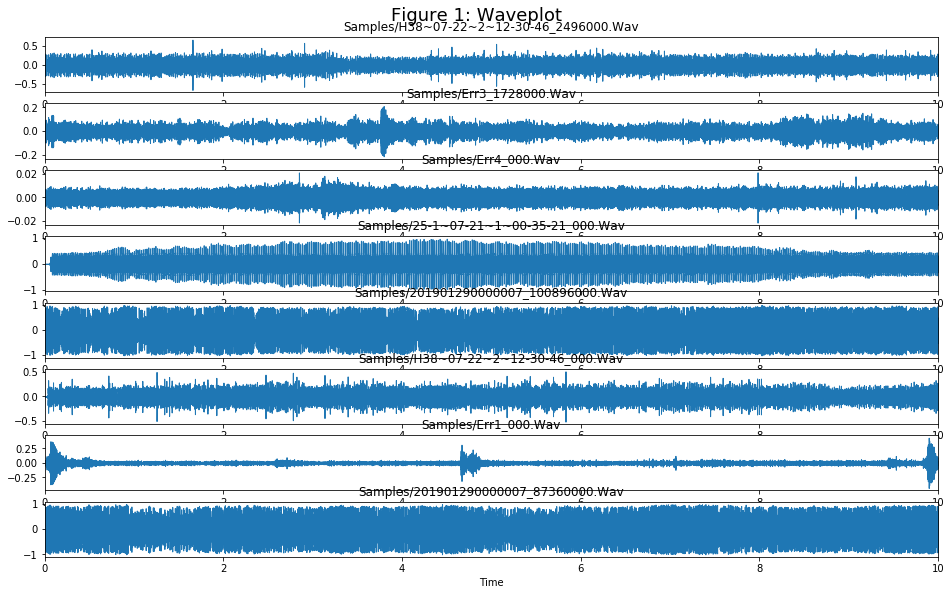

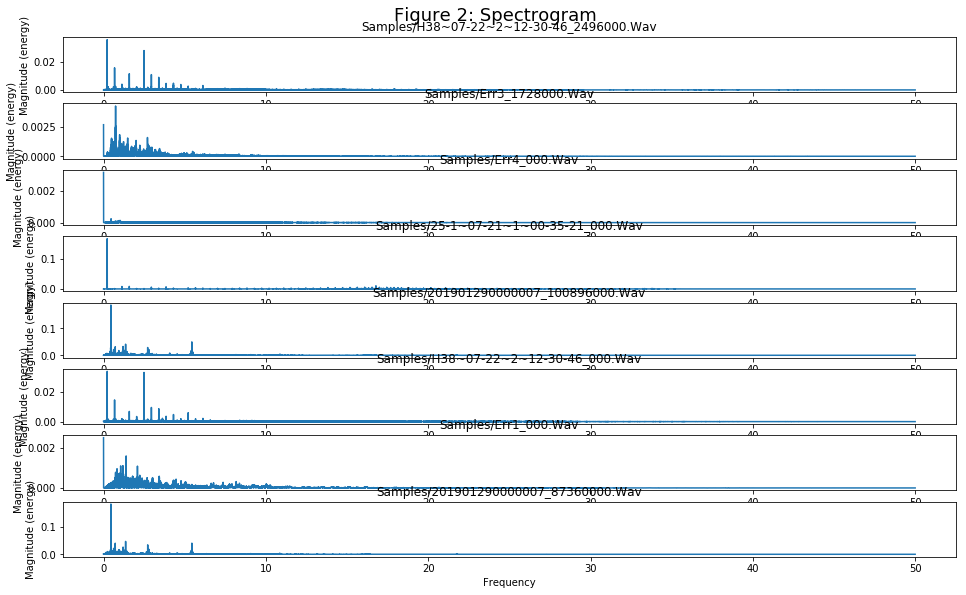

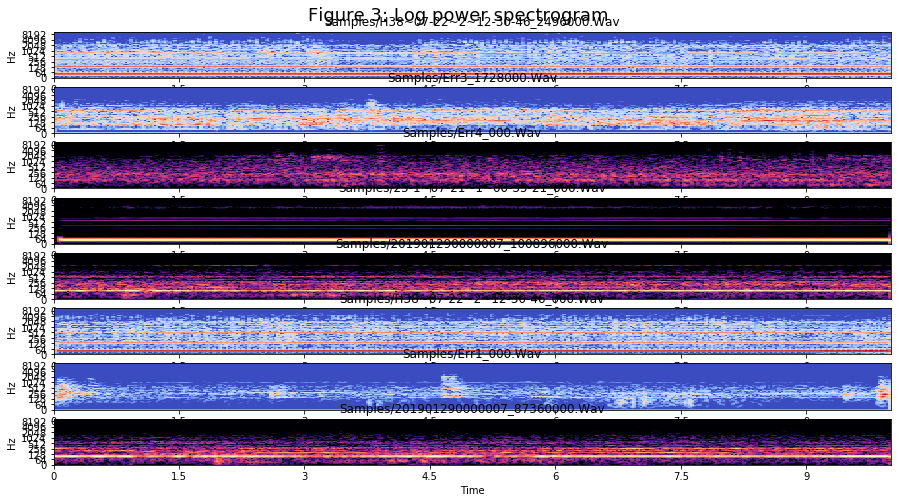

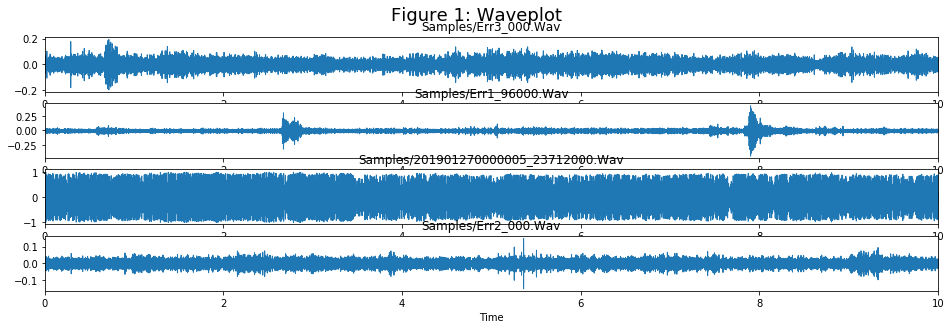

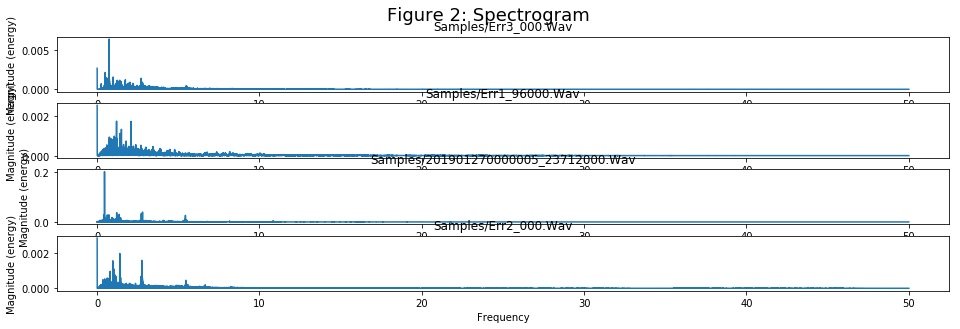

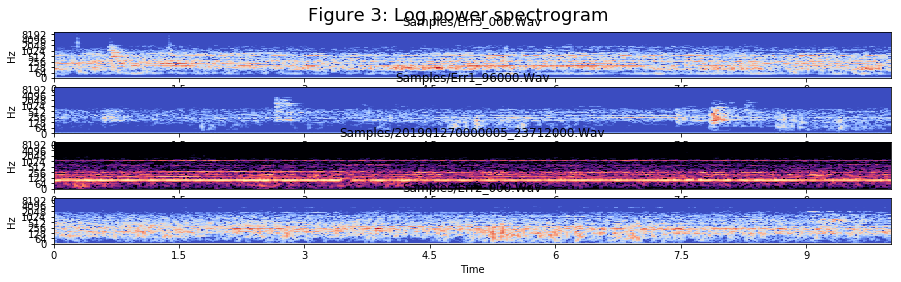

In [2]:
#encoding utf8 
# reference: https://www.kdnuggets.com/2016/09/urban-sound-classification-neural-networks-tensorflow.html
# http://aqibsaeed.github.io/2016-09-03-urban-sound-classification-part-1/
import glob
import os
import time
import librosa
import librosa.display

import numpy as np
# import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import normalize

import tensorflow as tf
from matplotlib.pyplot import specgram,magnitude_spectrum

%matplotlib inline

print "debug start"
def load_sound_files(file_paths):
    raw_sounds = []
    for fp in file_paths:
        X,sr = librosa.load(fp)
        print (fp, X.shape, sr)
        raw_sounds.append(X)
        print ("load file :",fp, len(X))    
    return raw_sounds

def plot_waves(sound_names,raw_sounds):
    i = 1
    #fig = plt.figure(figsize=(25,60), dpi = 900)
    fig = plt.figure(figsize=(16,12))
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        librosa.display.waveplot(np.array(f),sr=22050)
        plt.title(n.title())
        i += 1
    plt.suptitle('Figure 1: Waveplot',x=0.5, y=0.915,fontsize=18)
    #plt.show()
    
def plot_specgram(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(16,12)) # , dpi = 900
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        #specgram(np.array(f), Fs=22050)
        magnitude_spectrum(np.array(f), Fs=100)
        #print "specgram"
        plt.title(n.title())
        i += 1
    plt.suptitle('Figure 2: Spectrogram',x=0.5, y=0.915,fontsize=18)
    #plt.show()

def plot_log_power_specgram(sound_names,raw_sounds):
    i = 1
    fig = plt.figure(figsize=(15,10)) # , dpi = 900
    for n,f in zip(sound_names,raw_sounds):
        plt.subplot(10,1,i)
        #D = librosa.amplitude(np.abs(librosa.stft(f))**2, ref_power=np.max)
        D = librosa.amplitude_to_db(np.abs(librosa.stft(f))**2)
        librosa.display.specshow(D,x_axis='time' ,y_axis='log')
        plt.title(n.title())
        i += 1
    plt.suptitle('Figure 3: Log power spectrogram',x=0.5, y=0.915,fontsize=18)
    #plt.show()
    

def test_snd1():    
    sound_file_paths = ["57320-0-0-7.wav","24074-1-0-3.wav","15564-2-0-1.wav","31323-3-0-1.wav","46669-4-0-35.wav",
                       "89948-5-0-0.wav","40722-8-0-4.wav","103074-7-3-2.wav","106905-8-0-0.wav","108041-9-0-4.wav"]
    sound_names = ["air conditioner","car horn","children playing","dog bark","drilling","engine idling",
                   "gun shot","jackhammer","siren","street music"]

    sound_names = ["air conditioner","car horn","children playing","dog bark","drilling","engine idling",
                   "gun shot","jackhammer","siren","street music"]
    
    sound_file_paths = ["/root/pyAudioAnalysis/data/doremi.wav"]
    sound_names = ["test1"]
    
    
    sound_file_paths = ["/root/pyAudioAnalysis/data/count.wav"]
    
    sound_file_paths = ["samples/err1.wav"]
    sound_names = ["test1"]
    
    raw_sounds = load_sound_files(sound_file_paths)

    plot_waves(sound_names,raw_sounds)
    plot_specgram(sound_names,raw_sounds)
    plot_log_power_specgram(sound_names,raw_sounds)

    
def plot_snd(filename):
    raw_sounds = load_sound_files(filename)
    plot_waves(filename,raw_sounds)
    plot_specgram(filename,raw_sounds)
    plot_log_power_specgram(filename,raw_sounds)
        
def t2():
    #audio_path=librosa.util.example_audio_file()
    audio_path = "/root/pyAudioAnalysis/data/doremi.wav"
    X,sr = librosa.load(audio_path)
    #print (X, sr)
    print(type(X) , type(sr))
    print(X.shape , sr)

    
print("start on:",time.strftime('Run time: %Y-%m-%d %H:%M:%S'))
snds = ["samples/h38~07-21~1~01-54-26.mp3","samples/25-1~07-21~1~00-35-21.mp3",
        "samples/err1.wav","samples/err2.wav","samples/err3.wav","samples/err4.wav"]
        
#snds = ["debug/err1_007.wav","debug/err1_017.wav","debug/err1_022.wav","debug/err1_034.wav","debug/err1_039.wav"]    
snds = glob.glob("samples/*.wav")
#print "check files:", snds
plot_snd(snds[:8])
plot_snd(snds[8:16])
#plot_snd(["samples/err2.wav"])

#t2()
#plt.show()
print("done : ",time.strftime('Run time: %Y-%m-%d %H:%M:%S'))




In [2]:
import glob
test_files  = glob.glob("samples/*.wav")
print test_files

['samples/h38~07-22~2~12-30-46_2496000.wav', 'samples/err3_1728000.wav', 'samples/err4_000.wav', 'samples/25-1~07-21~1~00-35-21_000.wav', 'samples/201901290000007_100896000.wav', 'samples/h38~07-22~2~12-30-46_000.wav', 'samples/err1_000.wav', 'samples/201901290000007_87360000.wav', 'samples/err3_000.wav', 'samples/err1_96000.wav', 'samples/201901270000005_23712000.wav', 'samples/err2_000.wav']
